In [1]:
import numpy as np
import h5py
import pandas as pd

In [2]:
f = h5py.File('Data/train.h5','r')

In [3]:
def printName(name):
    print(name)

In [4]:
f.visit(printName)

train
train/axis0
train/axis1
train/block0_items
train/block0_values
train/block1_items
train/block1_values


In [5]:
# Save the data as variables
axis0 = f["train/axis0"][:]
axis1 = f["train/axis1"][:]
block0_items = f["train/block0_items"][:]
block0_values = f["train/block0_values"][:]
block1_items = f["train/block1_items"][:]
block1_values = f["train/block1_values"][:]

In [6]:
axis0.shape

(111,)

In [7]:
axis1.shape

(1710756,)

In [8]:
block0_items.shape

(2,)

In [9]:
block0_values.shape

(1710756, 2)

In [10]:
block1_items.shape

(109,)

In [11]:
block1_values.shape

(1710756, 109)

In [12]:
# Make a table of the data items
data = np.hstack((block0_values,block1_values))
columns = axis0
index = axis1

In [13]:
# Store data in a dataframe
DF = pd.DataFrame(data=data,index=index,columns=columns)

In [14]:
# Find the number of null items in each column
DF.head(block1_values.shape[0]).isnull().sum()

id                     0
timestamp              0
derived_0          72959
derived_1          81029
derived_2         398651
derived_3         149471
derived_4         406458
fundamental_0      23947
fundamental_1     679070
fundamental_2     368840
fundamental_3     454380
fundamental_5     962020
fundamental_6     701625
fundamental_7      26340
fundamental_8     373166
fundamental_9     565567
fundamental_10    112977
fundamental_11    368840
fundamental_12    110871
fundamental_13    355138
fundamental_14    356084
fundamental_15    354897
fundamental_16    355138
fundamental_17     97222
fundamental_18     15833
fundamental_19     54588
fundamental_20    110871
fundamental_21     54333
fundamental_22    558488
fundamental_23    356723
                   ...  
technical_13        4764
technical_14       14184
technical_16       19981
technical_17        4279
technical_18       20016
technical_19        2320
technical_20        4764
technical_21        2236
technical_22           0


In [17]:
df = DF

In [18]:
df_idx = df.iloc[:,:].isnull()
no_nan = np.sum(np.sum(df_idx,axis=1) > 0) # number of rows with at least 1 NAN
no_nnan = len(df_idx) - no_nan

print 'Number of rows with a NaN: {0}'.format(no_nan)
print 'Number of rows without a NaN: {0}'.format(no_nnan)

Number of rows with a NaN: 1487716
Number of rows without a NaN: 223040


In [19]:
# Eliminate rows with nan items
df_nnan = df.dropna(axis=0,how='any')

In [20]:
df_nnan.shape

(223040, 111)

In [21]:
import numpy as np
data = df_nnan[:3000]
data = np.array(data)
data.shape
# Split data into labels and variables
X = data[:,2:-1]
Y = data[:,-1].reshape(3000,1)
# data

In [22]:
X.shape

(3000, 108)

In [23]:
Y.shape

(3000, 1)

In [60]:
from sklearn.cross_validation import train_test_split
trainX,testx,trainY,testy = train_test_split(X,Y,test_size = 0.3)

In [61]:
trainX.shape

(2100, 108)

In [62]:
# Import Keras Libraries
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import sklearn

In [64]:
# Define Model Parameters
nb_feat   = 108   # no. of features/columns of input
L1_units  = 100   # no. of nodes in Layer 1
L2_units  = 80   # no. of nodes in Layer 2
L3_units  = 50   # no. of nodes in Layer 2
L4_units = 10
nb_class  = 1    # no. of output classes

model = Sequential()
# Neural Network Model
model = Sequential()                             # Sequential network model description
model.add(Dense(L1_units,input_dim=108))    # Add 1st Dense Layer
model.add(Activation("tanh"))                    # Add activation function

model.add(Dense(L2_units,))                       # Add 2nd Dense Layer
model.add(Activation("tanh"))                    # Add activation function

model.add(Dense(L3_units))                       # Add 3nd Dense Layer
model.add(Activation("tanh"))                    # Add activation function

model.add(Dense(L4_units))                       # Add 4nd Dense Layer
model.add(Activation("tanh"))                    # Add activation function

model.add(Dense(nb_class))                       # Add 5rd Dense Layer, also the classification layer
model.add(Activation('linear'))                 # Add sigmoid classification


In [65]:
model.compile(loss='mean_squared_error',optimizer='rmsprop', metrics=['accuracy'])

In [66]:
log = model.fit(trainX, trainY,nb_epoch=30, batch_size=20, verbose=0)
# ,validation_data=(testx, testy)
# df3k = df_3k.iloc[:,2:]
# sname = 'xtrip.csv'
# np.savetxt(sname,delimeter = ',')

In [57]:
log

In [77]:
loss = log.history['loss']
loss

[0.012092550826214609,
 0.0027792766302203137,
 0.0015687499311752618,
 0.0012325582787438873,
 0.000970388446668429,
 0.00080035184995116049,
 0.00060543944529767725,
 0.0005183837210920284,
 0.0004945178248038116,
 0.0004562794514987174,
 0.00041663335584979946,
 0.00039132661643504564,
 0.00045413093633084957,
 0.00038893272493234168,
 0.00037352290805540094,
 0.00036717437864613854,
 0.00036387303324383018,
 0.00035298085221300077,
 0.0003655178561790048,
 0.00035703934381239204,
 0.00035230463974931766,
 0.00033803443102875638,
 0.0003551591636053109,
 0.00034174560486072939,
 0.00036706029779798842,
 0.00046160961937857792,
 0.00041910914068077023,
 0.00038404417531897445,
 0.00036394586918287955,
 0.00034007796604696306]

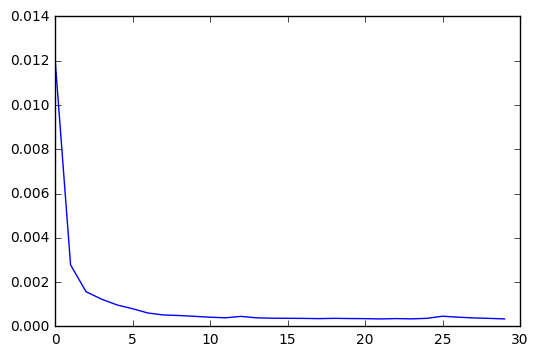

In [68]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.show()

In [72]:
model.metrics_names

['loss', 'acc']

In [76]:
model.evaluate(testx, testy, batch_size=20, verbose=1, sample_weight=None)

900/900 [==============================] - 0s     


[0.00038491168977796206, 0.0]

The model loss represents the mean squared error of the training. The plot shows that the train prediction is quite accurate as the mse error finally stops changing. The performance of the test data produces a loss of **average_loss_test = 0.00038491168977796206** as compared to the final loss of the training set **final_loss_training = 0.00034007796604696306**

The model takes about 40 seconds to run.

As for the matlab neural network, it took about 11.00s.

**MSE Error**

Training 2.1679e-4

Validation 3.081e-4

Testing 3.4213e-4



It does not make sense to compute the accuracy in this case because this is a regression problem as opposed to a labeling problem.